In [2]:
### import modules
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import pandas as pd
from sklearn.metrics import adjusted_rand_score, accuracy_score
from graspologic.utils import remap_labels
from utils import calculate_dissim, cluster_dissim, construct_df, plot_clustering, laplacian_dissim
from myst_nb import glue

# Matched Networks
Here we will use some well-known clustering algorithms ([Agglomerative clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering), [GMM](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture), [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)) to cluster networks on the dissimilarity matrices that we generated. 

To assess the performance of each clustering method, we calculate the [adjusted rand index (ARI)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html) and compare them. The rand index (RI) is a measure of how similar the predicted clusters are to the true, and the ARI is the raw RI value adjusted for chance. Thus, the ARI value is close to 0 for random labeling and close to 1 for accurate predictions.

Note that by default, we only show the result for Agglomerative clustering on the dissimilarity matrix constructed by the Edge weight kernel ($L^2$-norm), but all results can be expanded for viewing.

## Load Data

In [3]:
# HIDE CELL
from graspologic.datasets import load_mice
random.seed(3)

# Load the full mouse dataset
mice = load_mice()

# Stack all adjacency matrices in a 3D numpy array
graphs = np.array(mice.graphs)
print(graphs.shape)

# construct labels
labels = mice.labels

mapper = {'B6': 0, 'BTBR': 1, 'CAST': 2, 'DBA2': 3}
y = np.array([mapper[l] for l in list(labels)])

(32, 332, 332)


## Agglomerative Clustering

Here we use agglomerative clustering to cluster the graphs directly on the dissimilarity matrix, and the calculated linkage matrix and clusters are visualized with a heatmap below.

For each kernel, we report the accuracy score, the number of correct predictions divided by the total number of samples, and the adjusted rand index.

### Density

Accuracy: 0.53125
ARI: 0.20111167256189996


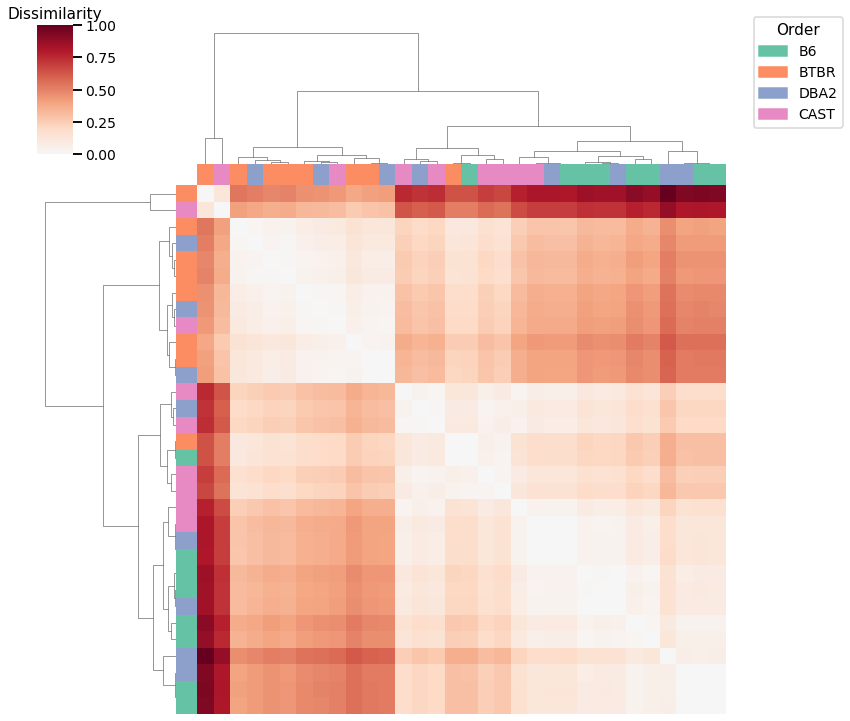

In [4]:
# HIDE CELL
# calculate dissimilarity matrix
scaled_density_dissim = calculate_dissim(graphs, method="density", norm=None, normalize=True)

# cluster dissimilarity matrix
density_linkage_matrix, density_pred = cluster_dissim(scaled_density_dissim, y, method="agg", n_components=4)

# calculate accuracy and ARI
density_pred = remap_labels(y, density_pred)
density_agg_score = accuracy_score(y, density_pred)
density_agg_ari = adjusted_rand_score(y, density_pred)

print(f"Accuracy: {density_agg_score}")
print(f"ARI: {density_agg_ari}")

# plot clustered dissimilarity matrix
plot_clustering(labels, 'agg', scaled_density_dissim, density_linkage_matrix)

### Average Edge Weight

Accuracy: 0.65625
ARI: 0.4124638612271121


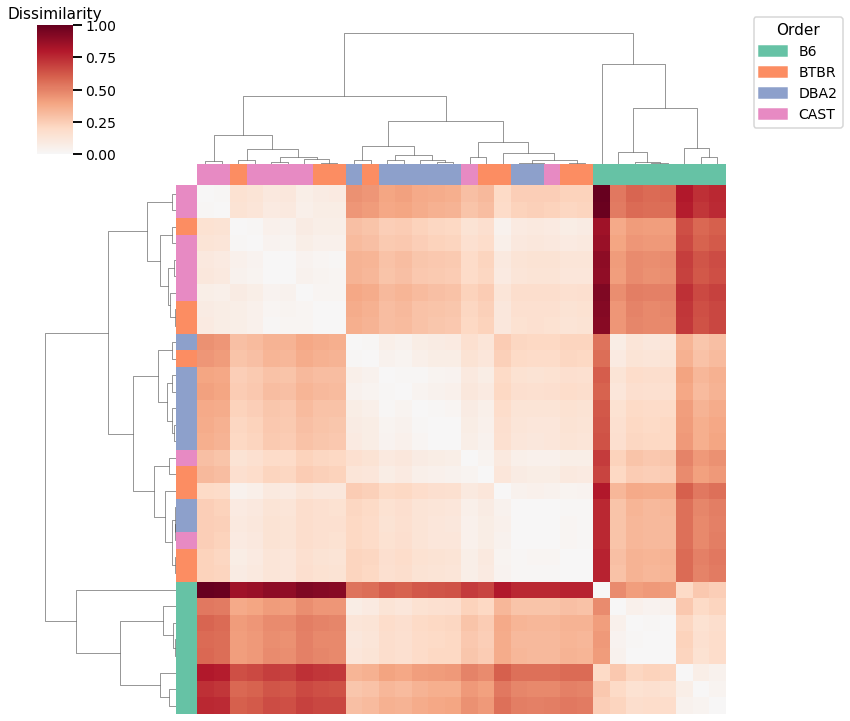

In [5]:
# HIDE CELL
# calculate dissimilarity matrix
scaled_avgedgeweight_dissim = calculate_dissim(graphs, method="avgedgeweight", norm=None, normalize=True)

# cluster dissimilarity matrix
avgedgeweight_linkage_matrix, avgedgeweight_pred = cluster_dissim(scaled_avgedgeweight_dissim, y, method="agg", n_components=4)

# calculate accuracy and ARI
avgedgeweight_pred = remap_labels(y, avgedgeweight_pred)
avgedgeweight_agg_score = accuracy_score(y, avgedgeweight_pred)
avgedgeweight_agg_ari = adjusted_rand_score(y, avgedgeweight_pred)

print(f"Accuracy: {avgedgeweight_agg_score}")
print(f"ARI: {avgedgeweight_agg_ari}")

# plot clustered dissimilarity matrix
fig = plot_clustering(labels, 'agg', scaled_avgedgeweight_dissim, avgedgeweight_linkage_matrix)

### Average of Adjacency Matrix

Accuracy: 0.65625
ARI: 0.3134054954204829


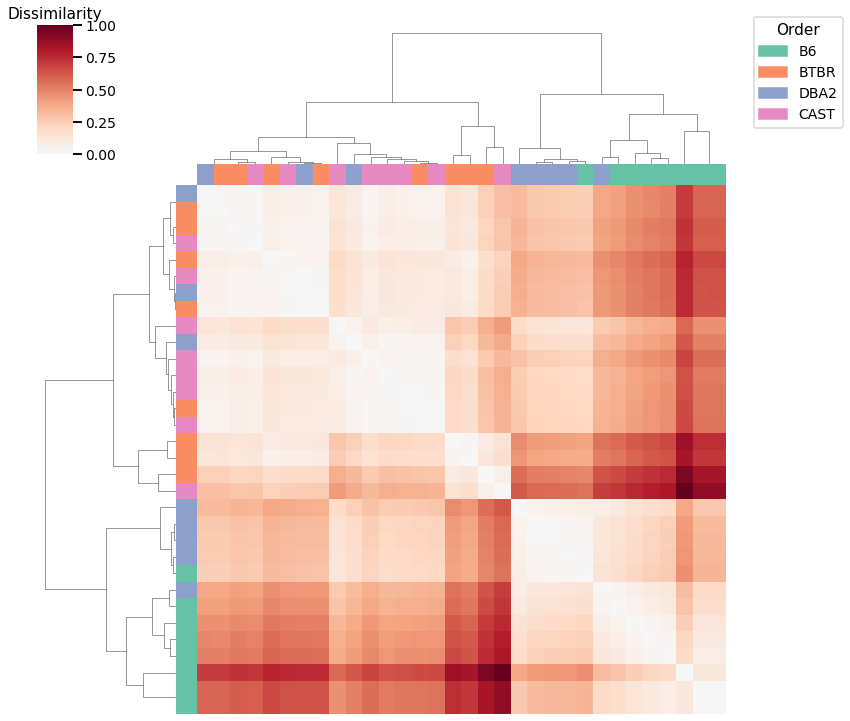

In [6]:
# HIDE CELL
# calculate dissimilarity matrix
scaled_avgadjmat_dissim = calculate_dissim(graphs, method="avgadjmatrix", norm=None, normalize=True)

# cluster dissimilarity matrix
avgadjmat_linkage_matrix, avgadjmat_pred = cluster_dissim(scaled_avgadjmat_dissim, y, method="agg", n_components=4)

# calculate accuracy and ARI
avgadjmat_pred = remap_labels(y, avgadjmat_pred)
avgadjmat_agg_score = accuracy_score(y, avgadjmat_pred)
avgadjmat_agg_ari = adjusted_rand_score(y, avgadjmat_pred)

print(f"Accuracy: {avgadjmat_agg_score}")
print(f"ARI: {avgadjmat_agg_ari}")

# plot clustered dissimilarity matrix
plot_clustering(labels, 'agg', scaled_avgadjmat_dissim, avgadjmat_linkage_matrix)

### Laplacian Spectral Distance

Accuracy: 0.59375
ARI: 0.27906976744186046


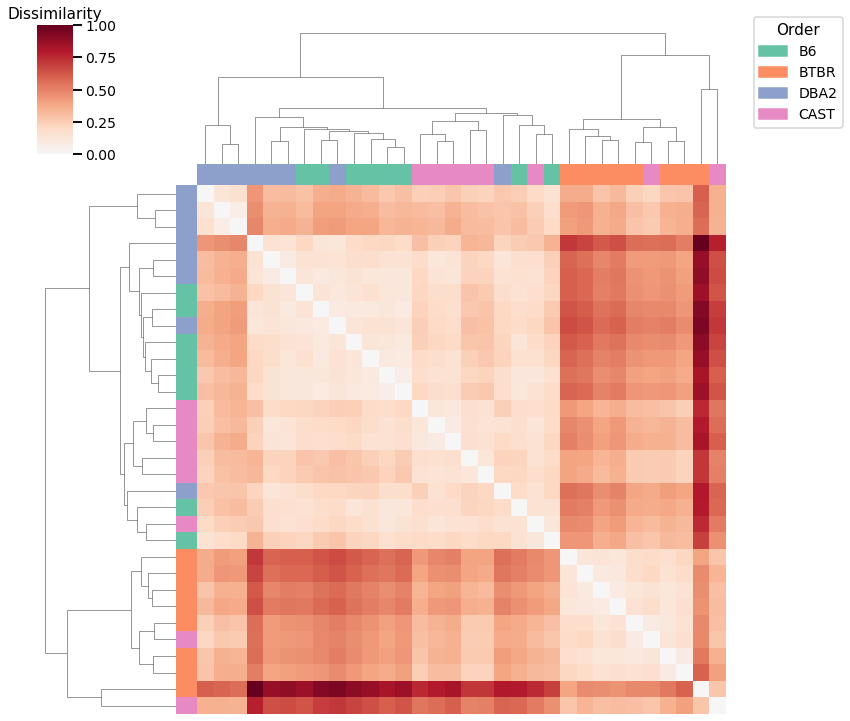

In [7]:
# HIDE CELL
# calculate dissimilarity matrix
scaled_lap_dissim = laplacian_dissim(graphs, transform='pass-to-ranks', metric='l2', normalize=True)

# cluster dissimilarity matrix
lap_linkage_matrix, lap_pred = cluster_dissim(scaled_lap_dissim, y, method="agg", n_components=4)

# calculate accuracy and ARI
lap_pred = remap_labels(y, lap_pred)
lap_agg_score = accuracy_score(y, lap_pred)
lap_agg_ari = adjusted_rand_score(y, lap_pred)

print(f"Accuracy: {lap_agg_score}")
print(f"ARI: {lap_agg_ari}")

# plot clustered dissimilarity matrix
plot_clustering(labels, 'agg', scaled_lap_dissim, lap_linkage_matrix)

### Node Degrees - L1 Norm

Accuracy: 0.46875
ARI: 0.17706740792216819


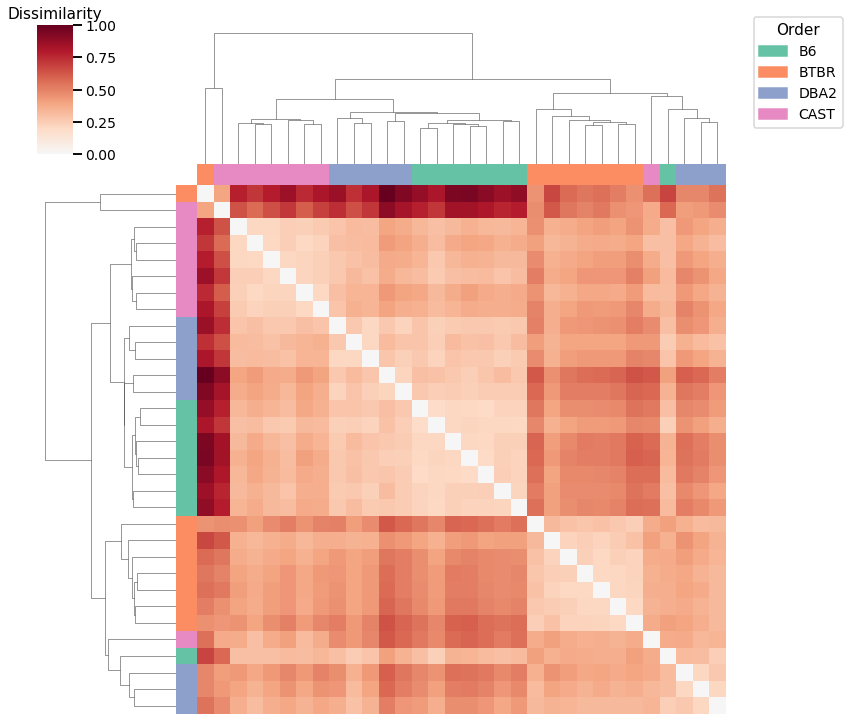

In [8]:
# HIDE CELL
# calculate dissimilarity matrix
scaled_nodedeg_dissim_l1 = calculate_dissim(graphs, method="degree", norm="l1", normalize=True)

# cluster dissimilarity matrix
nodedeg_l1_linkage_matrix, nodedeg_l1_pred = cluster_dissim(scaled_nodedeg_dissim_l1, y, method="agg", n_components=4)

# calculate accuracy and ARI
nodedeg_l1_pred = remap_labels(y, nodedeg_l1_pred)
nodedeg_l1_agg_score = accuracy_score(y, nodedeg_l1_pred)
nodedeg_l1_agg_ari = adjusted_rand_score(y, nodedeg_l1_pred)

print(f"Accuracy: {nodedeg_l1_agg_score}")
print(f"ARI: {nodedeg_l1_agg_ari}")

# plot clustered dissimilarity matrix
plot_clustering(labels, 'agg', scaled_nodedeg_dissim_l1, nodedeg_l1_linkage_matrix)

### Node Degrees - L2 Norm

Accuracy: 0.5
ARI: 0.27552275522755226


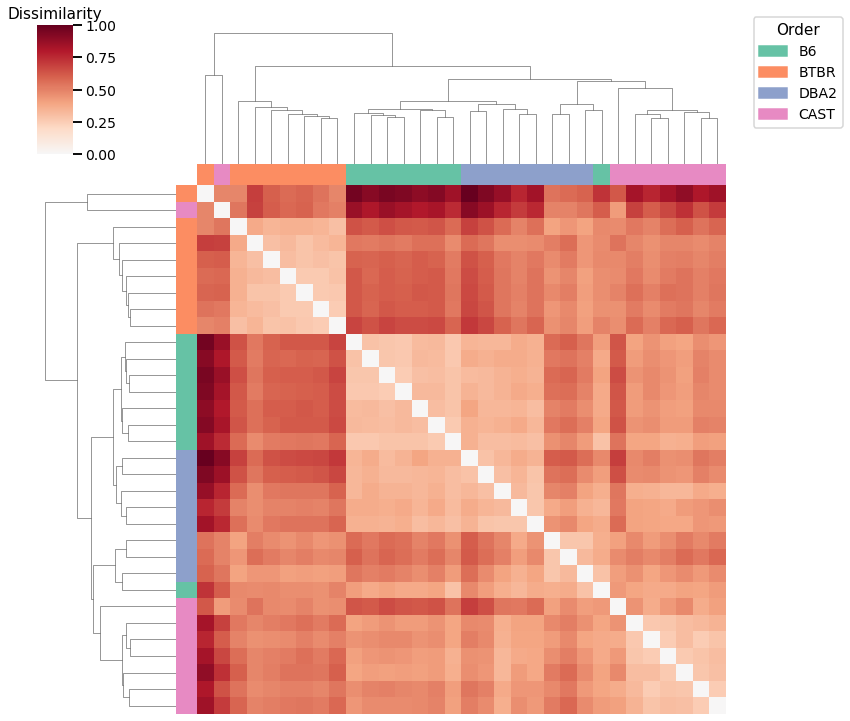

In [9]:
# HIDE CELL
# calculate dissimilarity matrix
scaled_nodedeg_dissim_l2 = calculate_dissim(graphs, method="degree", norm="l2", normalize=True)

# cluster dissimilarity matrix
nodedeg_l2_linkage_matrix, nodedeg_l2_pred = cluster_dissim(scaled_nodedeg_dissim_l2, y, method="agg", n_components=4)

# calculate accuracy and ARI
nodedeg_l2_pred = remap_labels(y, nodedeg_l2_pred)
nodedeg_l2_agg_score = accuracy_score(y, nodedeg_l2_pred)
nodedeg_l2_agg_ari = adjusted_rand_score(y, nodedeg_l2_pred)

print(f"Accuracy: {nodedeg_l2_agg_score}")
print(f"ARI: {nodedeg_l2_agg_ari}")

# plot clustered dissimilarity matrix
plot_clustering(labels, 'agg', scaled_nodedeg_dissim_l2, nodedeg_l2_linkage_matrix)

### Node Strength - L1 Norm

Accuracy: 0.65625
ARI: 0.45908859901744875


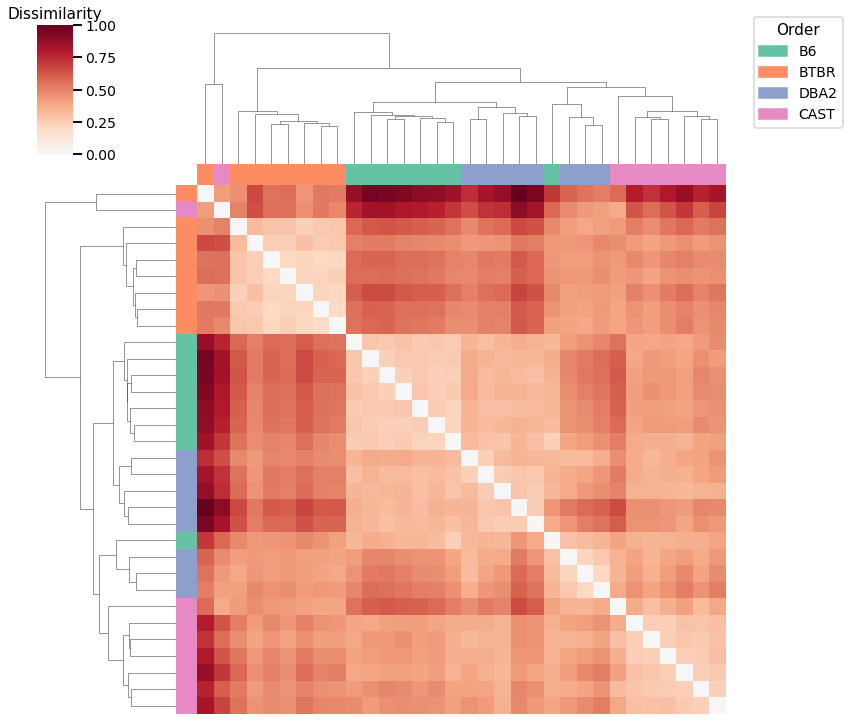

In [10]:
# HIDE CELL
# calculate dissimilarity matrix
scaled_nodestr_dissim_l1 = calculate_dissim(graphs, method="strength", norm="l1", normalize=True)

# cluster dissimilarity matrix
nodestr_l1_linkage_matrix, nodestr_l1_pred = cluster_dissim(scaled_nodestr_dissim_l1, y, method="agg", n_components=4)

# calculate accuracy and ARI
nodestr_l1_pred = remap_labels(y, nodestr_l1_pred)
nodestr_l1_agg_score = accuracy_score(y, nodestr_l1_pred)
nodestr_l1_agg_ari = adjusted_rand_score(y, nodestr_l1_pred)

print(f"Accuracy: {nodestr_l1_agg_score}")
print(f"ARI: {nodestr_l1_agg_ari}")

# plot clustered dissimilarity matrix
plot_clustering(labels, 'agg', scaled_nodestr_dissim_l1, nodestr_l1_linkage_matrix)

### Node Strength - L2 Norm

Accuracy: 0.5
ARI: 0.27552275522755226


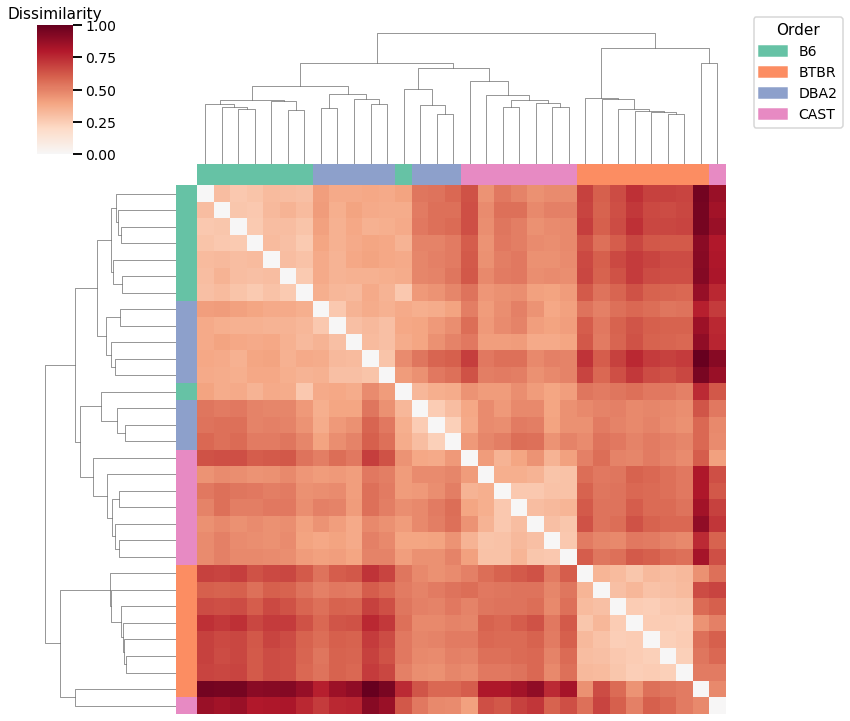

In [11]:
# HIDE CELL
# calculate dissimilarity matrix
scaled_nodestr_dissim_l2 = calculate_dissim(graphs, method="strength", norm="l2", normalize=True)

# cluster dissimilarity matrix
nodestr_l2_linkage_matrix, nodestr_l2_pred = cluster_dissim(scaled_nodestr_dissim_l2, y, method="agg", n_components=4)

# calculate accuracy and ARI
nodestr_l2_pred = remap_labels(y, nodestr_l2_pred)
nodestr_l2_agg_score = accuracy_score(y, nodestr_l2_pred)
nodestr_l2_agg_ari = adjusted_rand_score(y, nodestr_l2_pred)

print(f"Accuracy: {nodestr_l2_agg_score}")
print(f"ARI: {nodestr_l2_agg_ari}")

# plot clustered dissimilarity matrix
plot_clustering(labels, 'agg', scaled_nodestr_dissim_l2, nodestr_l2_linkage_matrix)

### Edge weights - L1 Norm

Accuracy: 0.6875
ARI: 0.6236421725239617


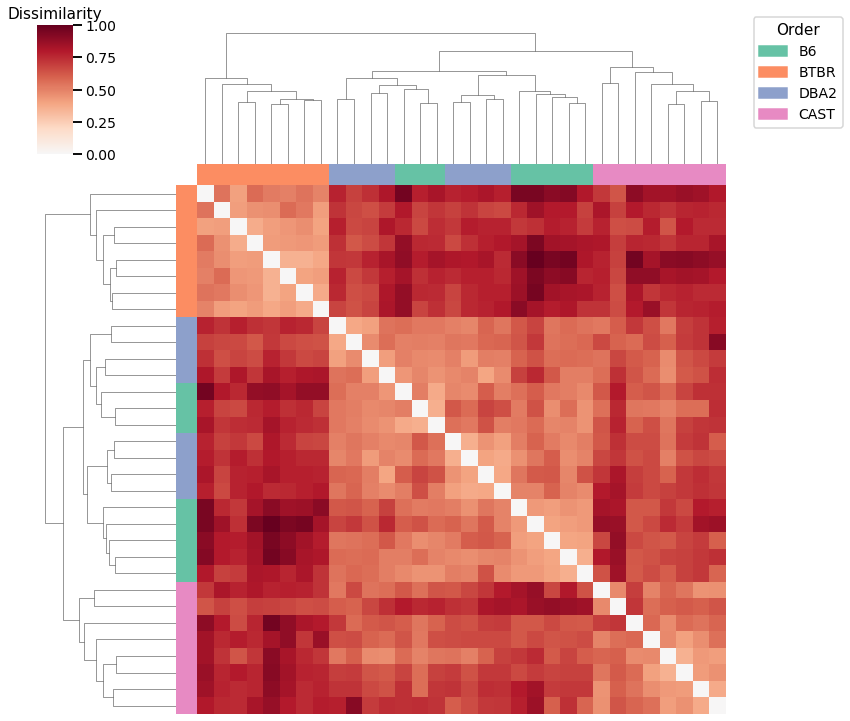

In [12]:
# HIDE CELL
# calculate dissimilarity matrix
scaled_edgeweight_dissim_l1 = calculate_dissim(graphs, method="edgeweight", norm="l1", normalize=True)

# cluster dissimilarity matrix
edgeweight_l1_linkage_matrix, edgeweight_l1_pred = cluster_dissim(scaled_edgeweight_dissim_l1, y, method="agg", n_components=4)

# calculate accuracy and ARI
edgeweight_l1_pred = remap_labels(y, edgeweight_l1_pred)
edgeweight_l1_agg_score = accuracy_score(y, edgeweight_l1_pred)
edgeweight_l1_agg_ari = adjusted_rand_score(y, edgeweight_l1_pred)

print(f"Accuracy: {edgeweight_l1_agg_score}")
print(f"ARI: {edgeweight_l1_agg_ari}")

# plot clustered dissimilarity matrix
plot_clustering(labels, 'agg', scaled_edgeweight_dissim_l1, edgeweight_l1_linkage_matrix)

### Edge weights - L2 Norm

Accuracy: 0.5
ARI: 0.27552275522755226


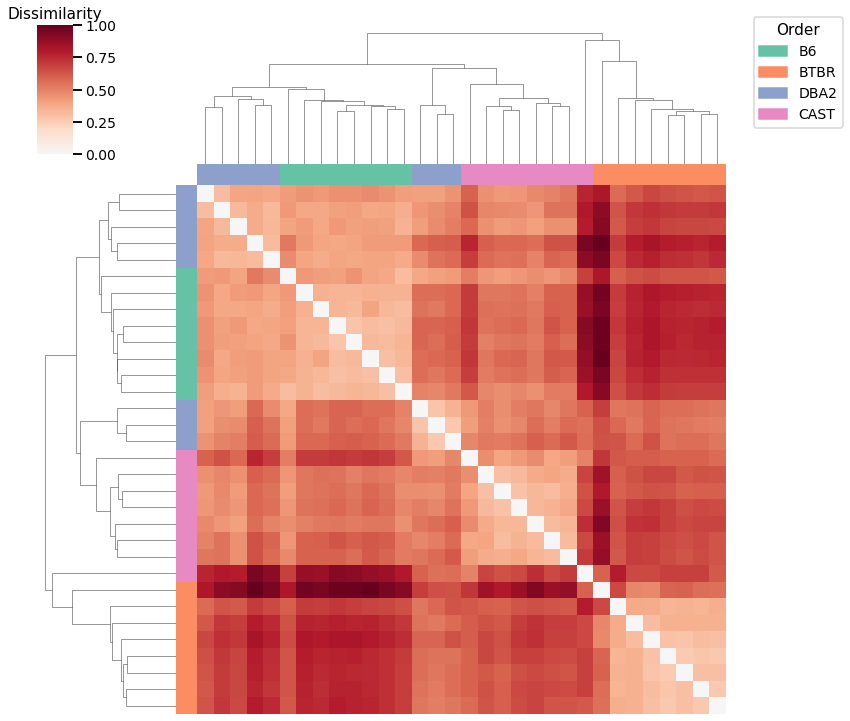

In [13]:
# HIDE CODE
# calculate dissimilarity matrix
scaled_edgeweight_dissim_l2 = calculate_dissim(graphs, method="edgeweight", norm="l2", normalize=True)

# cluster dissimilarity matrix
edgeweight_l2_linkage_matrix, edgeweight_l2_pred = cluster_dissim(scaled_edgeweight_dissim_l2, y, method="agg", n_components=4)

# calculate accuracy and ARI
edgeweight_l2_pred = remap_labels(y, edgeweight_l2_pred)
edgeweight_l2_agg_score = accuracy_score(y, edgeweight_l2_pred)
edgeweight_l2_agg_ari = adjusted_rand_score(y, edgeweight_l2_pred)

print(f"Accuracy: {edgeweight_l2_agg_score}")
print(f"ARI: {edgeweight_l2_agg_ari}")

# plot clustered dissimilarity matrix
plot_clustering(labels, 'agg', scaled_edgeweight_dissim_l2, edgeweight_l2_linkage_matrix)

### Omnibus Embedding

Accuracy: 0.71875
ARI: 0.6531126871552404


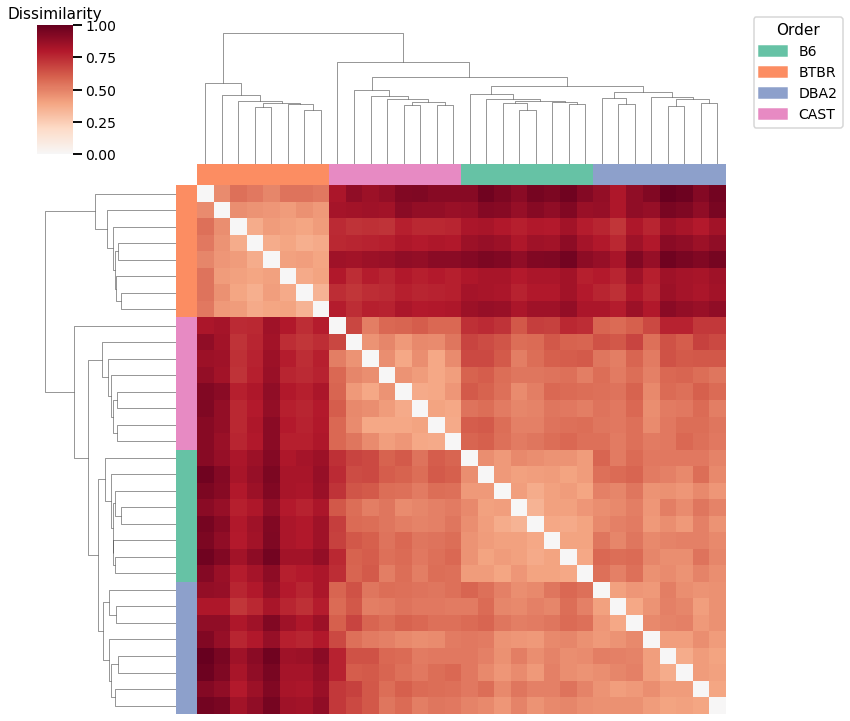

In [14]:
# HIDE CELL
from graspologic.embed import OmnibusEmbed

# embed using Omni
embedder = OmnibusEmbed(n_elbows=3)
omni_embedding = embedder.fit_transform(graphs)

# calculate dissimilarity matrix
omni_matrix = np.zeros((len(graphs), len(graphs)))
for i, embedding1 in enumerate(omni_embedding):
    for j, embedding2 in enumerate(omni_embedding):
        dist = np.linalg.norm(embedding1 - embedding2, ord="fro")
        omni_matrix[i, j] = dist

scaled_omni_dissim = omni_matrix / np.max(omni_matrix)

# cluster dissimilarity matrix
omni_linkage_matrix, omni_pred = cluster_dissim(scaled_omni_dissim, y, method="agg", n_components=4)

# calculate accuracy and ARI
omni_pred = remap_labels(y, omni_pred)
omni_agg_score = accuracy_score(y, omni_pred)
omni_agg_ari = adjusted_rand_score(y, omni_pred)

print(f"Accuracy: {omni_agg_score}")
print(f"ARI: {omni_agg_ari}")

# plot clustered dissimilarity matrix
plot_clustering(labels, 'agg', scaled_omni_dissim, omni_linkage_matrix)

## GMM

We use [classical multidimensional scaling](https://microsoft.github.io/graspologic/latest/reference/reference/embed.html#graspologic.embed.ClassicalMDS) to embed the dissimilarity matrices into a 2-dimensional space, then we use GMM to cluster these points. We assign the number of components to be 4 since there are 4 genotypes, and the clusters are visualized with a scattermap below. The colors indicate the true genotypes, and the shapes (O or X) indicate whether or not the predictions are correct. 

For each kernel, we report the accuracy score, the number of correct predictions divided by the total number of samples, and the adjusted rand index.

### Density

Accuracy: 0.53125
ARI: 0.20111167256189996


<AxesSubplot:xlabel='CMDS Dimension 1', ylabel='CMDS Dimension 2'>

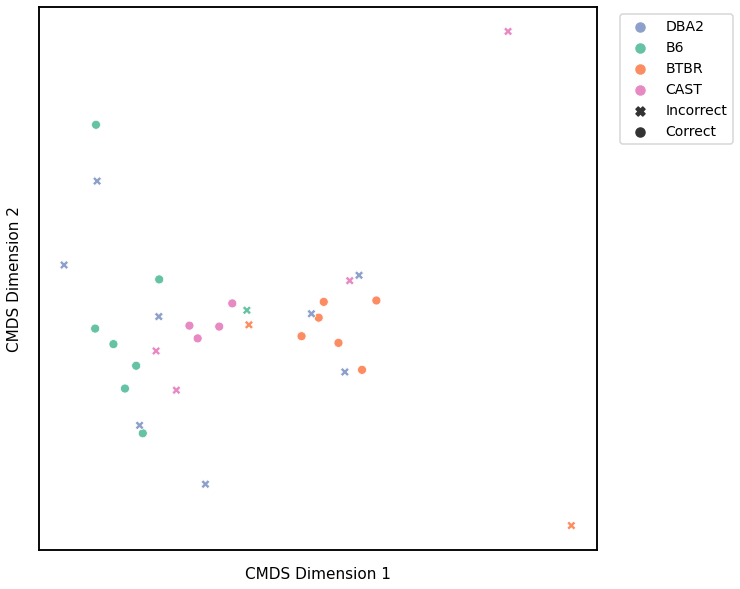

In [15]:
### HIDE CELL
# cluster dissimilarity matrix
density_gm_embedding, density_gm_pred = cluster_dissim(scaled_density_dissim, y, method='gmm', n_components=4)
density_gm, density_gm_pred = construct_df(density_gm_embedding, labels, y, density_gm_pred)

# calculate accuracy and ARI
density_gm_score = accuracy_score(y, density_gm_pred)
density_gm_ari = adjusted_rand_score(y, density_gm_pred)

print(f"Accuracy: {density_gm_score}")
print(f"ARI: {density_gm_ari}")

# plot clustering
plot_clustering(labels, 'gmm', data=density_gm)

### Average Edge Weight

Accuracy: 0.65625
ARI: 0.39636032757051864


<AxesSubplot:xlabel='CMDS Dimension 1', ylabel='CMDS Dimension 2'>

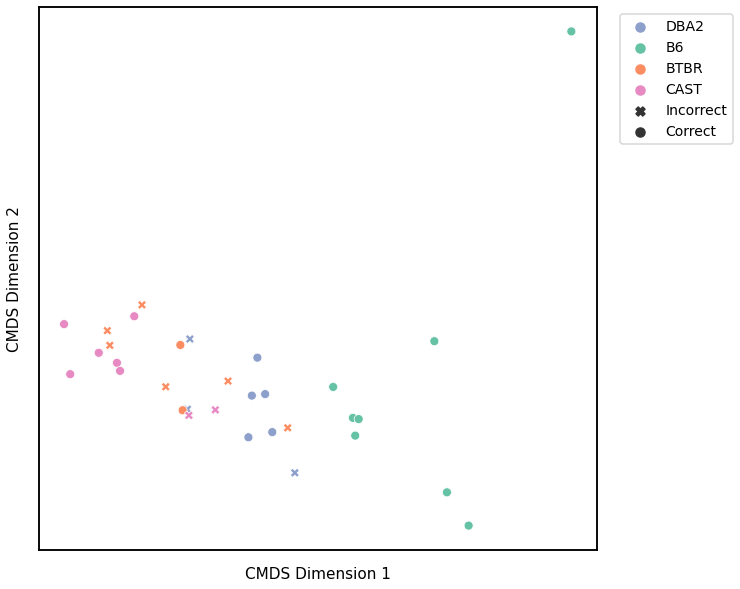

In [16]:
# HIDE CELL
# cluster dissimilarity matrix
avgedgeweight_gm_embedding, avgedgeweight_gm_pred = cluster_dissim(scaled_avgedgeweight_dissim, y, method='gmm', n_components=4)
avgedgeweight_gm, avgedgeweight_gm_pred = construct_df(avgedgeweight_gm_embedding, labels, y, avgedgeweight_gm_pred)

# calculate accuracy and ARI
avgedgeweight_gm_score = accuracy_score(y, avgedgeweight_gm_pred)
avgedgeweight_gm_ari = adjusted_rand_score(y, avgedgeweight_gm_pred)

print(f"Accuracy: {avgedgeweight_gm_score}")
print(f"ARI: {avgedgeweight_gm_ari}")

# plot clustering
plot_clustering(labels, 'gmm', data=avgedgeweight_gm)


### Average of the Adjacency Matrix

Accuracy: 0.59375
ARI: 0.27401624980086026


<AxesSubplot:xlabel='CMDS Dimension 1', ylabel='CMDS Dimension 2'>

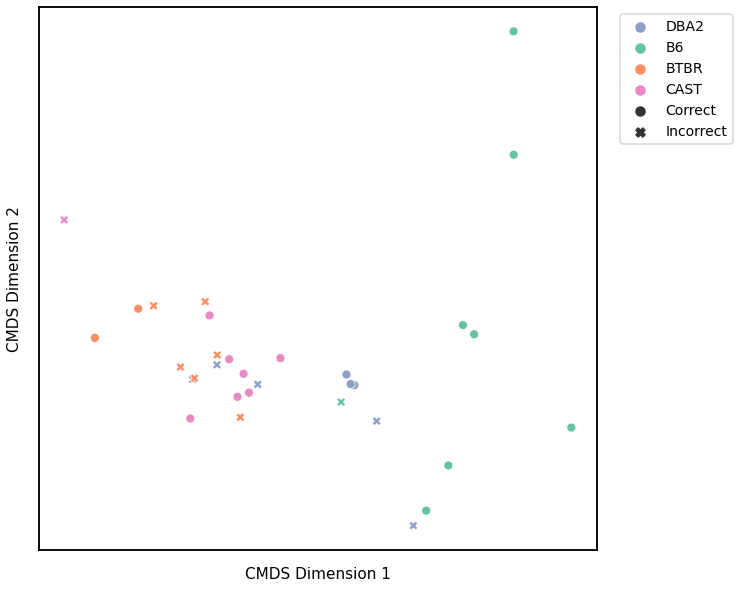

In [17]:
# HIDE CELL
# cluster dissimilarity matrix
avgadjmat_gm_embedding, avgadjmat_gm_pred = cluster_dissim(scaled_avgadjmat_dissim, y, method="gmm", n_components=4)
avgadjmat_gm, avgadjmat_gm_pred = construct_df(avgadjmat_gm_embedding, labels, y, avgadjmat_gm_pred)

# calculate accuracy and ARI
avgadjmat_gm_score = accuracy_score(y, avgadjmat_gm_pred)
avgadjmat_gm_ari = adjusted_rand_score(y, avgadjmat_gm_pred)

print(f"Accuracy: {avgadjmat_gm_score}")
print(f"ARI: {avgadjmat_gm_ari}")

# plot clustering
plot_clustering(labels, 'gmm', data=avgadjmat_gm)

### Laplacian Spectral Distance

Accuracy: 0.5625
ARI: 0.29275603663613653


<AxesSubplot:xlabel='CMDS Dimension 1', ylabel='CMDS Dimension 2'>

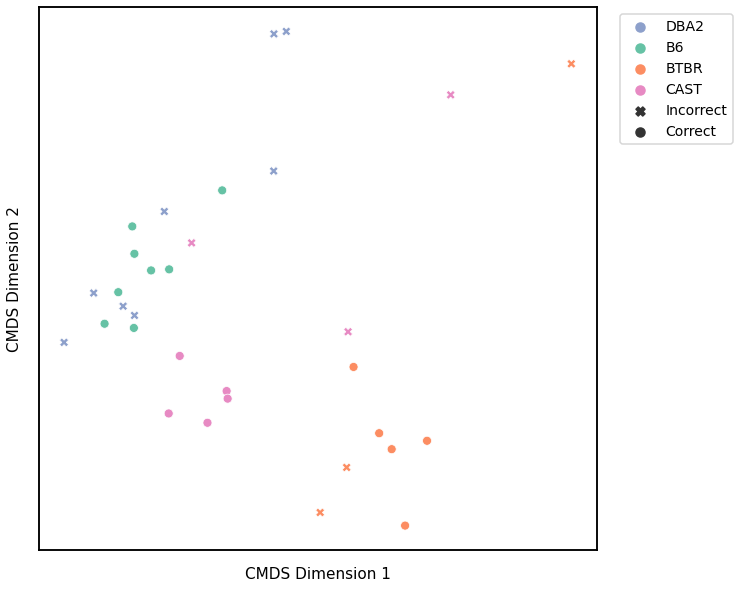

In [18]:
# HIDE CELL
# cluster dissimilarity matrix
lap_gm_embedding, lap_gm_pred = cluster_dissim(scaled_lap_dissim, y, method="gmm", n_components=4)
lap_gm, lap_gm_pred = construct_df(lap_gm_embedding, labels, y, lap_gm_pred)

# calculate accuracy and ARI
lap_gm_score = accuracy_score(y, lap_gm_pred)
lap_gm_ari = adjusted_rand_score(y, lap_gm_pred)

print(f"Accuracy: {lap_gm_score}")
print(f"ARI: {lap_gm_ari}")

# plot clustering
plot_clustering(labels, 'gmm', data=lap_gm)

### Node Degrees - L1 Norm

Accuracy: 0.78125
ARI: 0.5656050955414013


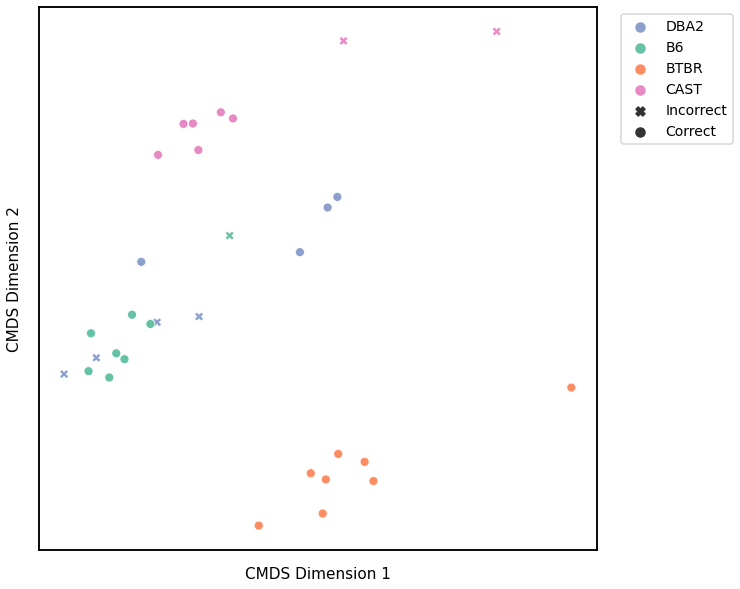

In [19]:
# HIDE CELL
# cluster dissimilarity matrix
nodedeg_l1_gm_embedding, nodedeg_l1_gm_pred = cluster_dissim(scaled_nodedeg_dissim_l1, y, method="gmm", n_components=4)
nodedeg_l1_gm, nodedeg_l1_gm_pred = construct_df(nodedeg_l1_gm_embedding, labels, y, nodedeg_l1_gm_pred)

# calculate accuracy and ARI
nodedeg_l1_gm_score = accuracy_score(y, nodedeg_l1_gm_pred)
nodedeg_l1_gm_ari = adjusted_rand_score(y, nodedeg_l1_gm_pred)

print(f"Accuracy: {nodedeg_l1_gm_score}")
print(f"ARI: {nodedeg_l1_gm_ari}")

# plot clustering
fig = plot_clustering(labels, 'gmm', data=nodedeg_l1_gm)
fig.legend(bbox_to_anchor=(1.257, 1))

### Node Degrees - L2 Norm

Accuracy: 0.6875
ARI: 0.5248441974060973


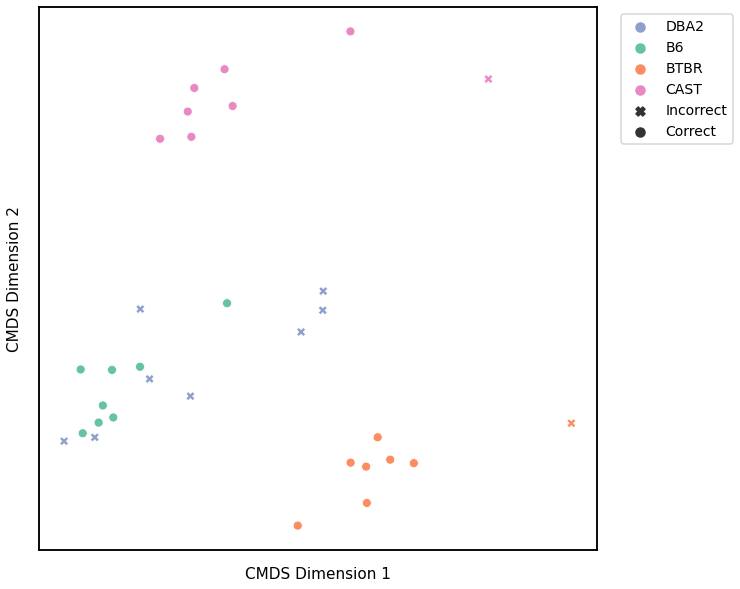

In [20]:
# HIDE CELL
# cluster dissimilarity matrix
nodedeg_l2_gm_embedding, nodedeg_l2_gm_pred = cluster_dissim(scaled_nodedeg_dissim_l2, y, method="gmm", n_components=4)
nodedeg_l2_gm, nodedeg_l2_gm_pred = construct_df(nodedeg_l2_gm_embedding, labels, y, nodedeg_l2_gm_pred)

# calculate accuracy and ARI
nodedeg_l2_gm_score = accuracy_score(y, nodedeg_l2_gm_pred)
nodedeg_l2_gm_ari = adjusted_rand_score(y, nodedeg_l2_gm_pred)

print(f"Accuracy: {nodedeg_l2_gm_score}")
print(f"ARI: {nodedeg_l2_gm_ari}")

# plot clustering
fig = plot_clustering(labels, 'gmm', data=nodedeg_l2_gm)
fig.legend(bbox_to_anchor=(1.257, 1))

### Node Strength - L1 Norm

Accuracy: 0.65625
ARI: 0.45908859901744875


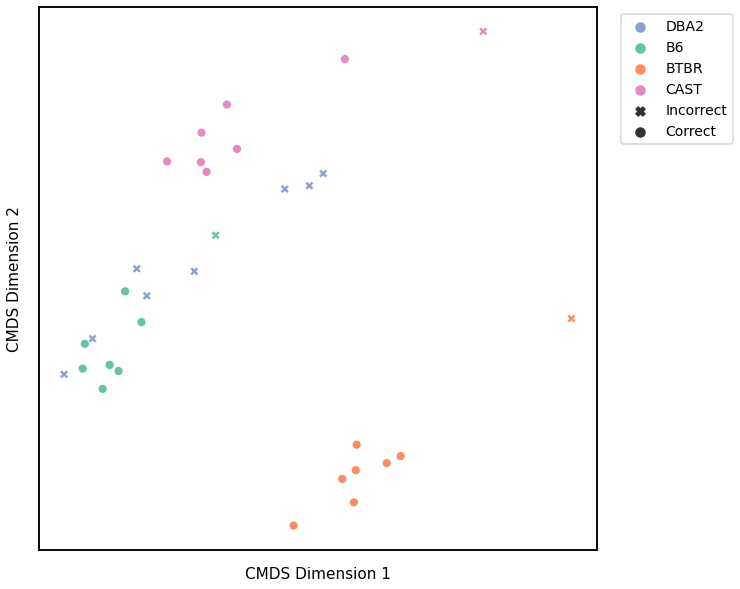

In [21]:
# HIDE CELL
# cluster dissimilarity matrix
nodestr_l1_gm_embedding, nodestr_l1_gm_pred = cluster_dissim(scaled_nodestr_dissim_l1, y, method="gmm", n_components=4)
nodestr_l1_gm, nodestr_l1_gm_pred = construct_df(nodestr_l1_gm_embedding, labels, y, nodestr_l1_gm_pred)

# calculate accuracy and ARI
nodestr_l1_gm_score = accuracy_score(y, nodestr_l1_gm_pred)
nodestr_l1_gm_ari = adjusted_rand_score(y, nodestr_l1_gm_pred)

print(f"Accuracy: {nodestr_l1_gm_score}")
print(f"ARI: {nodestr_l1_gm_ari}")

# plot clustering
fig = plot_clustering(labels, 'gmm', data=nodestr_l1_gm)
fig.legend(bbox_to_anchor=(1.257, 1))

### Node Strength - L2 Norm

Accuracy: 0.6875
ARI: 0.5536168050143995


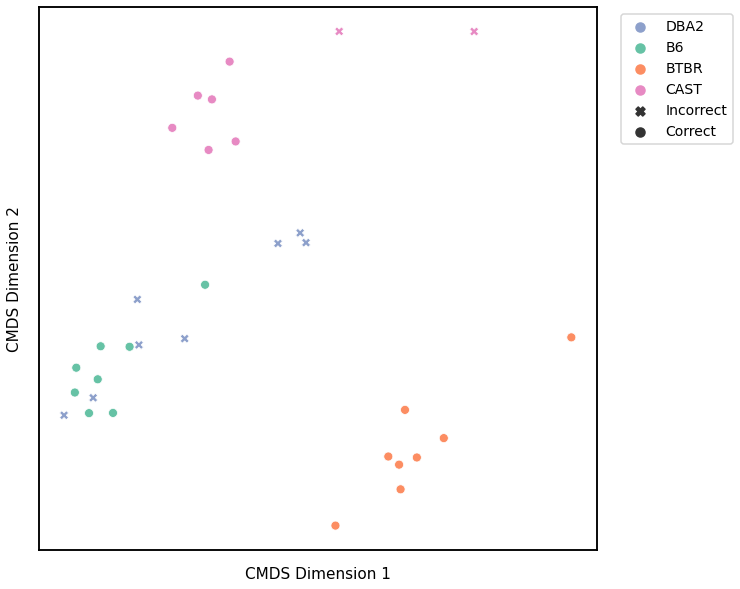

In [22]:
# HIDE CELL
# cluster dissimilarity matrix
nodestr_l2_gm_embedding, nodestr_l2_gm_pred = cluster_dissim(scaled_nodestr_dissim_l2, y, method="gmm", n_components=4)
nodestr_l2_gm, nodestr_l2_gm_pred = construct_df(nodestr_l2_gm_embedding, labels, y, nodestr_l2_gm_pred)

# calculate accuracy and ARI
nodestr_l2_gm_score = accuracy_score(y, nodestr_l2_gm_pred)
nodestr_l2_gm_ari = adjusted_rand_score(y, nodestr_l2_gm_pred)

print(f"Accuracy: {nodestr_l2_gm_score}")
print(f"ARI: {nodestr_l2_gm_ari}")

# plot clustering
fig = plot_clustering(labels, 'gmm', data=nodestr_l2_gm)
fig.legend(bbox_to_anchor=(1.257, 1))

### Edge Weights - L1 Norm

Accuracy: 0.71875
ARI: 0.6531126871552404


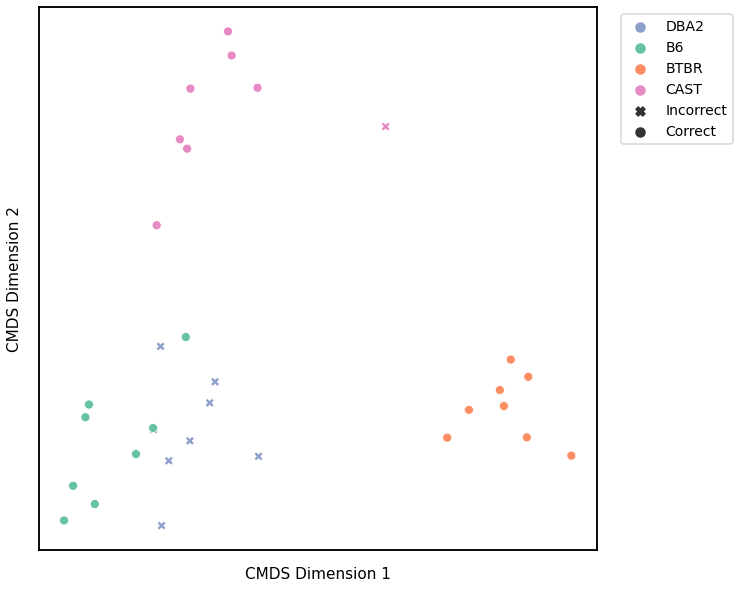

In [23]:
# HIDE CELL
# cluster dissimilarity matrix
edgeweight_l1_gm_embedding, edgeweight_l1_gm_pred = cluster_dissim(scaled_edgeweight_dissim_l1, y, method="gmm", n_components=4)
edgeweight_l1_gm, edgeweight_l1_gm_pred = construct_df(edgeweight_l1_gm_embedding, labels, y, edgeweight_l1_gm_pred)

# calculate accuracy and ARI
edgeweight_l1_gm_score = accuracy_score(y, edgeweight_l1_gm_pred)
edgeweight_l1_gm_ari = adjusted_rand_score(y, edgeweight_l1_gm_pred)

print(f"Accuracy: {edgeweight_l1_gm_score}")
print(f"ARI: {edgeweight_l1_gm_ari}")

# plot clustering
fig = plot_clustering(labels, 'gmm', data=edgeweight_l1_gm)
fig.legend(bbox_to_anchor=(1.257, 1))

### Edge Weights - L2 Norm

Accuracy: 0.6875
ARI: 0.5536168050143995


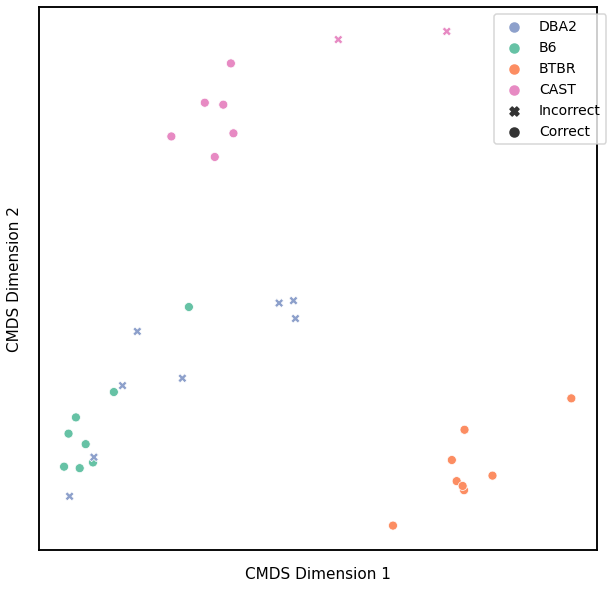

In [24]:
# HIDE CELL
from graspologic.utils import symmetrize

# make dissimilarity matrix symmetric
scaled_edgeweight_dissim_l2 = symmetrize(scaled_edgeweight_dissim_l2)

# cluster dissimilarity matrix
edgeweight_l2_gm_embedding, edgeweight_l2_gm_pred = cluster_dissim(dissim_matrix=scaled_edgeweight_dissim_l2, labels=y, \
    method="gmm", n_components=4)
edgeweight_l2_gm, edgeweight_l2_gm_pred = construct_df(edgeweight_l2_gm_embedding, labels, y, edgeweight_l2_gm_pred)

# calculate accuracy and ARI
edgeweight_l2_gm_score = accuracy_score(y, edgeweight_l2_gm_pred)
edgeweight_l2_gm_ari = adjusted_rand_score(y, edgeweight_l2_gm_pred)

print(f"Accuracy: {edgeweight_l2_gm_score}")
print(f"ARI: {edgeweight_l2_gm_ari}")

# plot clustering
fig = plot_clustering(labels, 'gmm', data=edgeweight_l2_gm)

### Omnibus Embedding

Accuracy: 0.84375
ARI: 0.6916259721468621


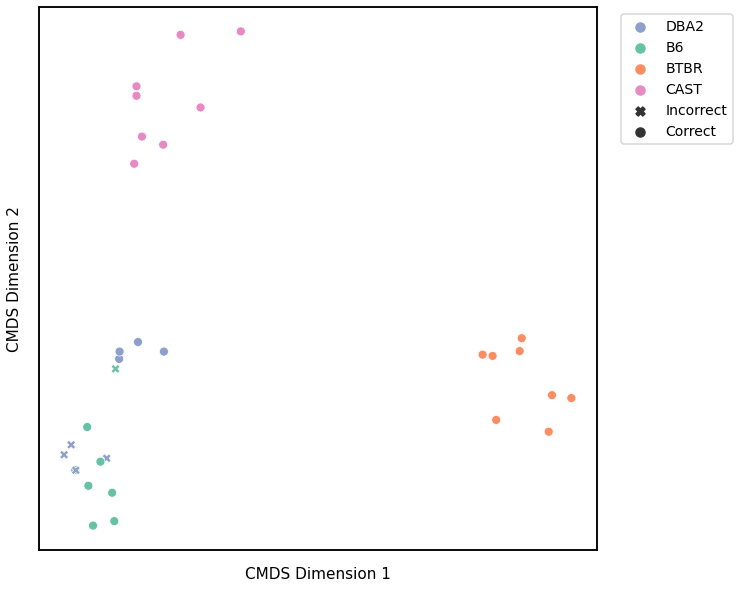

In [25]:
# HIDE CELL
# cluster dissimilarity matrix
omni_gm_embedding, omni_gm_pred = cluster_dissim(scaled_omni_dissim, y, method="gmm", n_components=4)
omni_gm, omni_gm_pred = construct_df(omni_gm_embedding, labels, y, omni_gm_pred)

# calculate accuracy and ARI
omni_gm_score = accuracy_score(y, omni_gm_pred)
omni_gm_ari = adjusted_rand_score(y, omni_gm_pred)

print(f"Accuracy: {omni_gm_score}")
print(f"ARI: {omni_gm_ari}")

# plot clustering
fig = plot_clustering(labels, 'gmm', data=omni_gm)
fig.legend(bbox_to_anchor=(1.257, 1))

## KMeans

Similar to GMM, we first use [classical multidimensional scaling](https://microsoft.github.io/graspologic/latest/reference/reference/embed.html#graspologic.embed.ClassicalMDS) to embed the dissimilarity matrices into a 2-dimensional space, then use KMeans to predict the genotypes of each point. The clusters are shown in the scatterplot below, and the colors represent the true genotypes and the shapes (O or X) indicate whether or not we made correct predictions.

For each kernel, we report the raw accuracy score, the number of correct predictions divided by the total number of samples, and the adjusted rand index.

### Density

Accuracy: 0.5625
ARI: 0.24777853725222146


<AxesSubplot:xlabel='CMDS Dimension 1', ylabel='CMDS Dimension 2'>

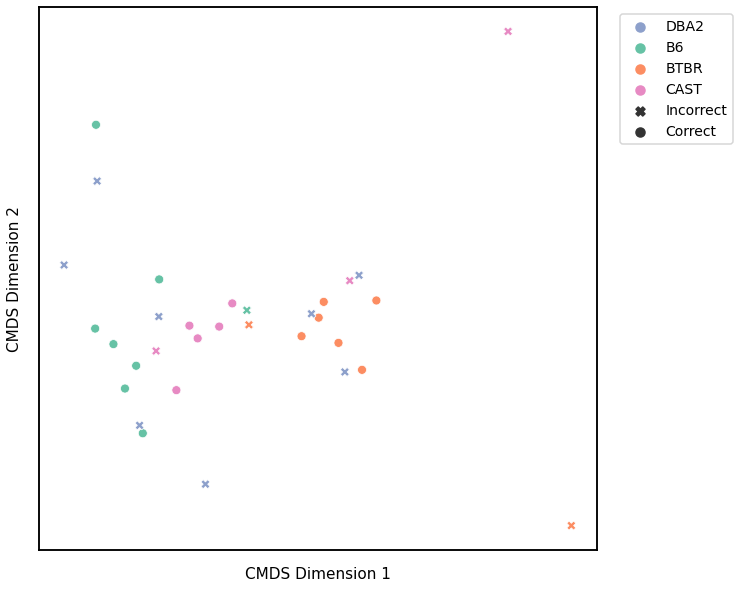

In [26]:
# HIDE CELL
# cluster dissimilarity matrix
density_km_embedding, density_km_pred = cluster_dissim(scaled_density_dissim, y, method="kmeans", n_components=4)
density_km, density_km_pred = construct_df(density_km_embedding, labels, y, density_km_pred)

# calculate accuracy and ARI
density_km_score = accuracy_score(y, density_km_pred)
density_km_ari = adjusted_rand_score(y, density_km_pred)

print(f"Accuracy: {density_km_score}")
print(f"ARI: {density_km_ari}")

# plot clustering
plot_clustering(labels, 'kmeans', data=density_km)

### Average Edge Weight

Accuracy: 0.53125
ARI: 0.2412006432017152


<AxesSubplot:xlabel='CMDS Dimension 1', ylabel='CMDS Dimension 2'>

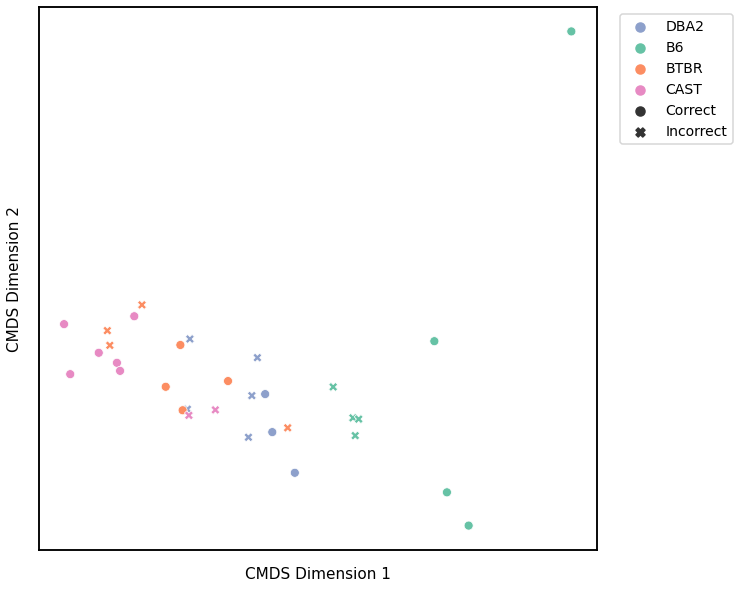

In [27]:
# HIDE CELL
# cluster dissimilarity matrix
avgedgeweight_km_embedding, avgedgeweight_km_pred = cluster_dissim(scaled_avgedgeweight_dissim, y, method='kmeans', n_components=4)
avgedgeweight_km, avgedgeweight_km_pred = construct_df(avgedgeweight_km_embedding, labels, y, avgedgeweight_km_pred)

# calculate accuracy and ARI
avgedgeweight_km_score = accuracy_score(y, avgedgeweight_km_pred)
avgedgeweight_km_ari = adjusted_rand_score(y, avgedgeweight_km_pred)

print(f"Accuracy: {avgedgeweight_km_score}")
print(f"ARI: {avgedgeweight_km_ari}")

# plot clustering
plot_clustering(labels, 'kmeans', data=avgedgeweight_km)

### Average of the Adjacency Matrix

Accuracy: 0.65625
ARI: 0.3094958968347011


<AxesSubplot:xlabel='CMDS Dimension 1', ylabel='CMDS Dimension 2'>

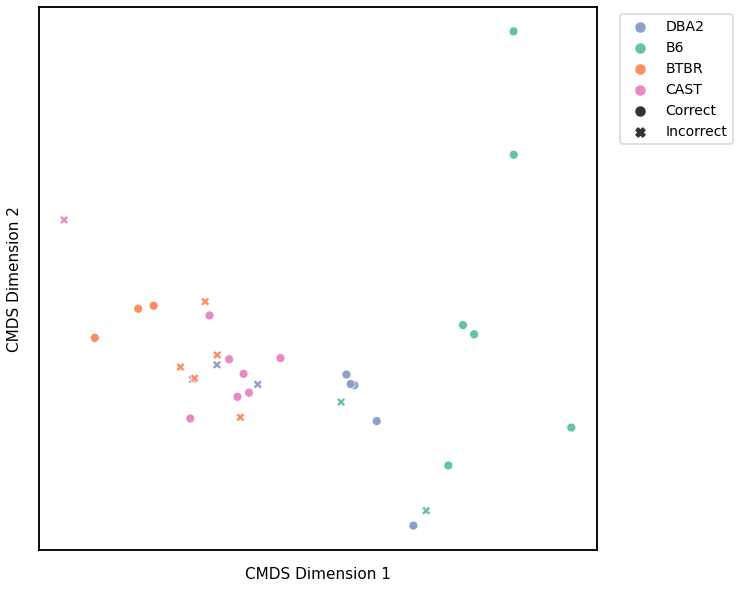

In [28]:
# HIDE CELL
# cluster dissimilarity matrix
avgadjmat_km_embedding, avgadjmat_km_pred = cluster_dissim(scaled_avgadjmat_dissim, y, method='kmeans', n_components=4)
avgadjmat_km, avgadjmat_km_pred = construct_df(avgadjmat_km_embedding, labels, y, avgadjmat_km_pred)

# calculate accuracy and ARI
avgadjmat_km_score = accuracy_score(y, avgadjmat_km_pred)
avgadjmat_km_ari = adjusted_rand_score(y, avgadjmat_km_pred)

print(f"Accuracy: {avgadjmat_km_score}")
print(f"ARI: {avgadjmat_km_ari}")

# plot clustering
plot_clustering(labels, 'kmeans', data=avgadjmat_km)

### Laplacian Spectral Distance

Accuracy: 0.59375
ARI: 0.34355412502117566


<AxesSubplot:xlabel='CMDS Dimension 1', ylabel='CMDS Dimension 2'>

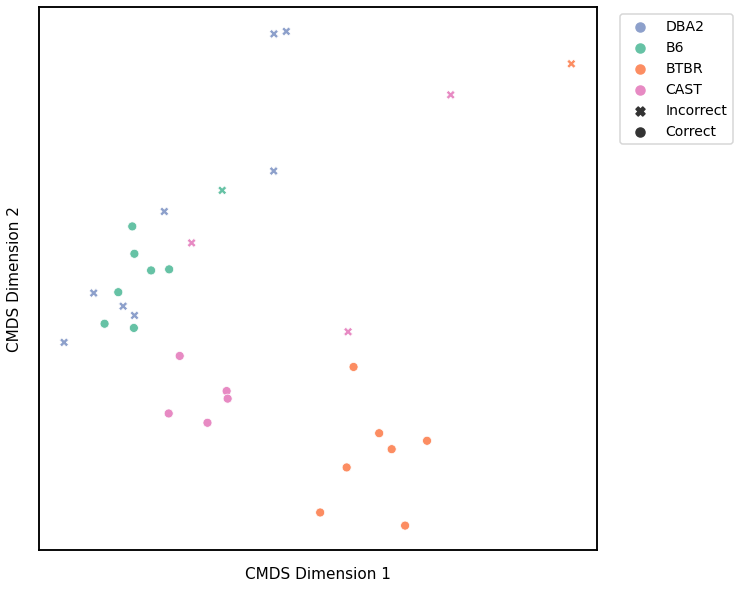

In [29]:
# HIDE CELL
# cluster dissimilarity matrix
lap_km_embedding, lap_km_pred = cluster_dissim(scaled_lap_dissim, y, method="gmm", n_components=4)
lap_km, lap_km_pred = construct_df(lap_km_embedding, labels, y, lap_km_pred)

# calculate accuracy and ARI
lap_km_score = accuracy_score(y, lap_km_pred)
lap_km_ari = adjusted_rand_score(y, lap_km_pred)

print(f"Accuracy: {lap_km_score}")
print(f"ARI: {lap_km_ari}")

# plot clustering
plot_clustering(labels, 'gmm', data=lap_km)

### Node Degree - L1 Norm

Accuracy: 0.625
ARI: 0.36778063410454154


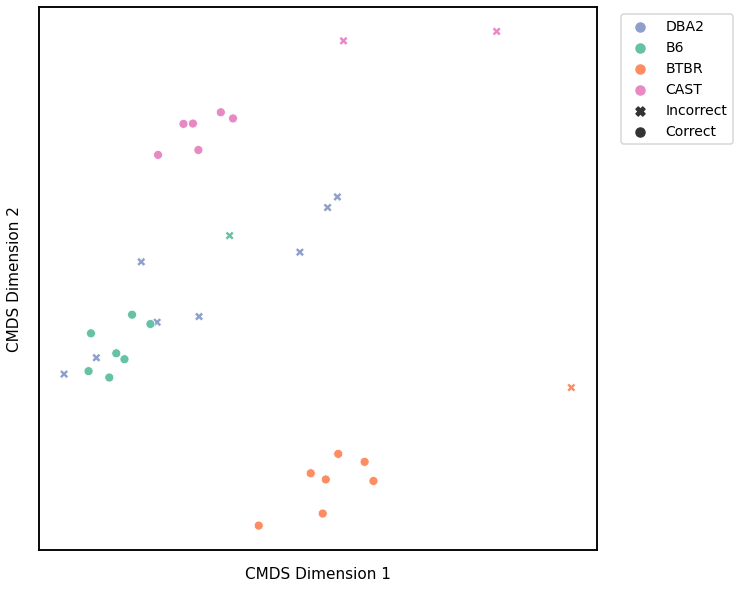

In [30]:
# HIDE CELL
# cluster dissimilarity matrix
nodedeg_l1_km_embedding, nodedeg_l1_km_pred = cluster_dissim(scaled_nodedeg_dissim_l1, y, method='kmeans', n_components=4)
nodedeg_l1_km, nodedeg_l1_km_pred = construct_df(nodedeg_l1_km_embedding, labels, y, nodedeg_l1_km_pred)

# calculate accuracy and ARI
nodedeg_l1_km_score = accuracy_score(y, nodedeg_l1_km_pred)
nodedeg_l1_km_ari = adjusted_rand_score(y, nodedeg_l1_km_pred)

print(f"Accuracy: {nodedeg_l1_km_score}")
print(f"ARI: {nodedeg_l1_km_ari}")

# plot clustering
fig = plot_clustering(labels, 'kmeans', data=nodedeg_l1_km)
fig.legend(bbox_to_anchor=(1.257, 1))

### Node Degree - L2 Norm

Accuracy: 0.65625
ARI: 0.47026657552973344


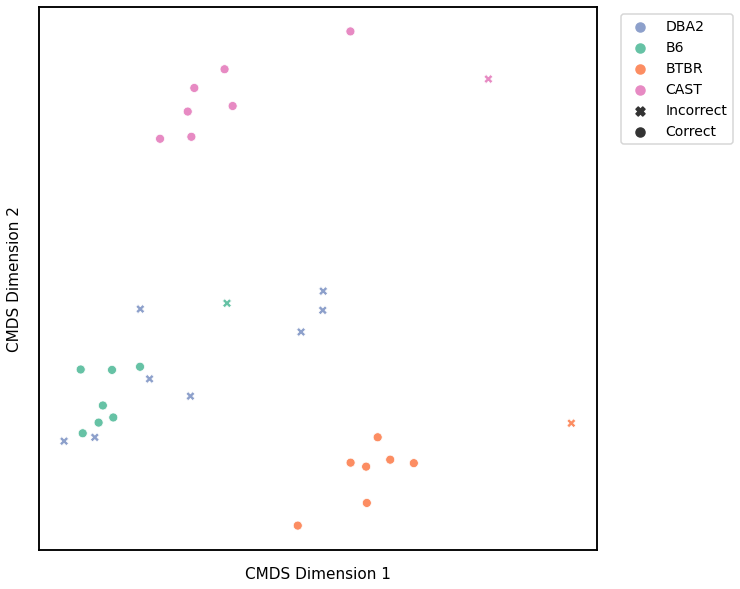

In [31]:
# HIDE CELL
# cluster dissimilarity matrix
nodedeg_l2_km_embedding, nodedeg_l2_km_pred = cluster_dissim(scaled_nodedeg_dissim_l2, y, method='kmeans', n_components=4)
nodedeg_l2_km, nodedeg_l2_km_pred = construct_df(nodedeg_l2_km_embedding, labels, y, nodedeg_l2_km_pred)

# calculate accuracy and ARI
nodedeg_l2_km_score = accuracy_score(y, nodedeg_l2_km_pred)
nodedeg_l2_km_ari = adjusted_rand_score(y, nodedeg_l2_km_pred)

print(f"Accuracy: {nodedeg_l2_km_score}")
print(f"ARI: {nodedeg_l2_km_ari}")

# plot clustering
fig = plot_clustering(labels, 'kmeans', data=nodedeg_l2_km)
fig.legend(bbox_to_anchor=(1.257, 1))

### Node Strength - L1 Norm

Accuracy: 0.65625
ARI: 0.44858546501778757


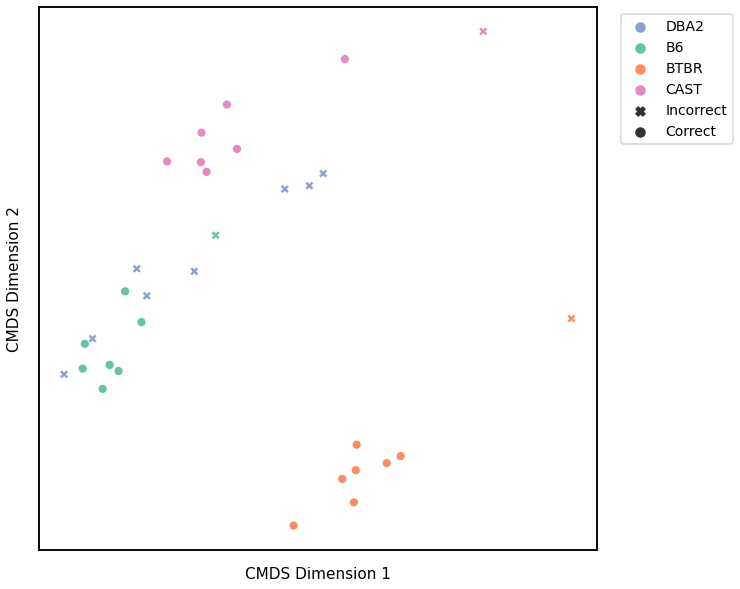

In [32]:
# HIDE CELL
# cluster dissimilarity matrix
nodestr_l1_km_embedding, nodestr_l1_km_pred = cluster_dissim(scaled_nodestr_dissim_l1, y, method='kmeans', n_components=4)
nodestr_l1_km, nodestr_l1_km_pred = construct_df(nodestr_l1_km_embedding, labels, y, nodestr_l1_km_pred)

# calculate accuracy and ARI
nodestr_l1_km_score = accuracy_score(y, nodestr_l1_km_pred)
nodestr_l1_km_ari = adjusted_rand_score(y, nodestr_l1_km_pred)

print(f"Accuracy: {nodestr_l1_km_score}")
print(f"ARI: {nodestr_l1_km_ari}")

# plot clustering
fig = plot_clustering(labels, 'kmeans', data=nodestr_l1_km)
fig.legend(bbox_to_anchor=(1.257, 1))

### Node Strength - L2 Norm

Accuracy: 0.65625
ARI: 0.45908859901744875


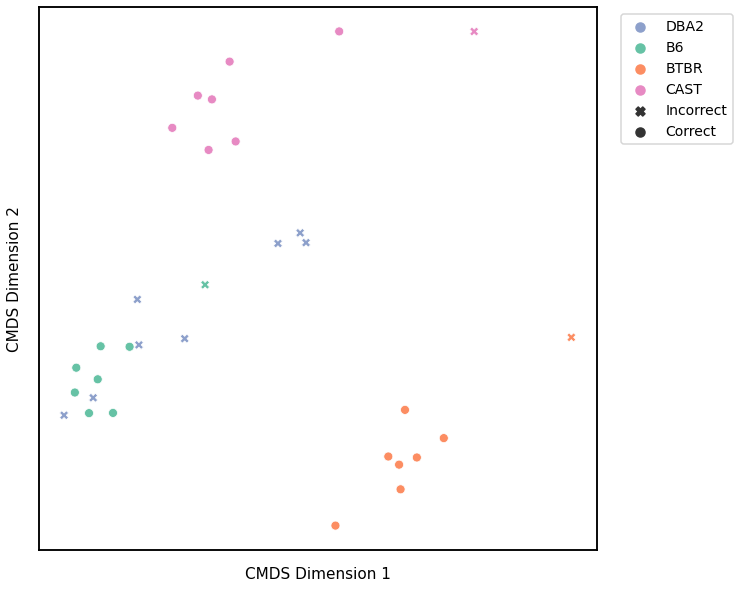

In [33]:
# HIDE CELL
# cluster dissimilarity matrix
nodestr_l2_km_embedding, nodestr_l2_km_pred = cluster_dissim(scaled_nodestr_dissim_l2, y, method='kmeans', n_components=4)
nodestr_l2_km, nodestr_l2_km_pred = construct_df(nodestr_l2_km_embedding, labels, y, nodestr_l2_km_pred)

# calculate accuracy and ARI
nodestr_l2_km_score = accuracy_score(y, nodestr_l2_km_pred)
nodestr_l2_km_ari = adjusted_rand_score(y, nodestr_l2_km_pred)

print(f"Accuracy: {nodestr_l2_km_score}")
print(f"ARI: {nodestr_l2_km_ari}")

# plot clustering
fig = plot_clustering(labels, 'kmeans', data=nodestr_l2_km)
fig.legend(bbox_to_anchor=(1.257, 1))

### Edge Weight - L1 Norm

Accuracy: 0.90625
ARI: 0.7758205080660115


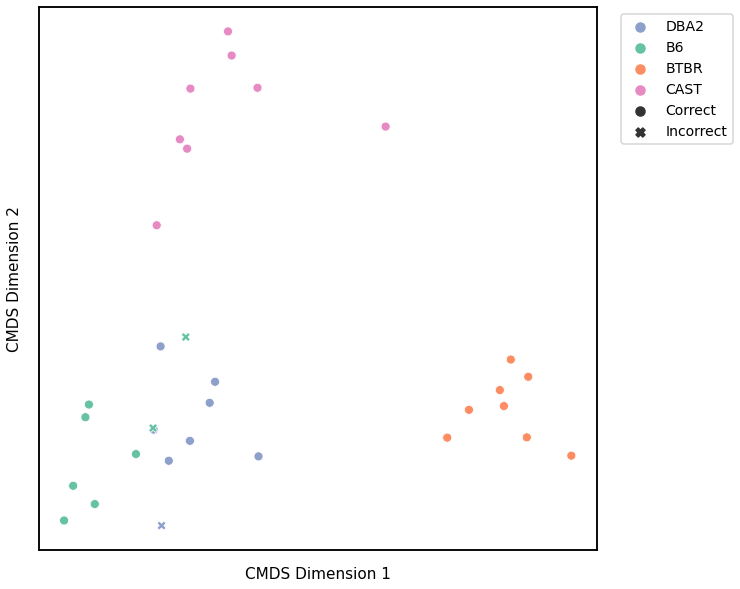

In [34]:
# HIDE CELL
# cluster dissimilarity matrix
edgeweight_l1_km_embedding, edgeweight_l1_km_pred = cluster_dissim(scaled_edgeweight_dissim_l1, y, method='kmeans', n_components=4)
edgeweight_l1_km, edgeweight_l1_km_pred = construct_df(edgeweight_l1_km_embedding, labels, y, edgeweight_l1_km_pred)

# calculate accuracy and ARI
edgeweight_l1_km_score = accuracy_score(y, edgeweight_l1_km_pred)
edgeweight_l1_km_ari = adjusted_rand_score(y, edgeweight_l1_km_pred)

print(f"Accuracy: {edgeweight_l1_km_score}")
print(f"ARI: {edgeweight_l1_km_ari}")

# plot clustering
fig = plot_clustering(labels, 'kmeans', data=edgeweight_l1_km)
fig.legend(bbox_to_anchor=(1.257, 1))

### Edge Weight - L2 Norm

Accuracy: 0.65625
ARI: 0.4914559125085441


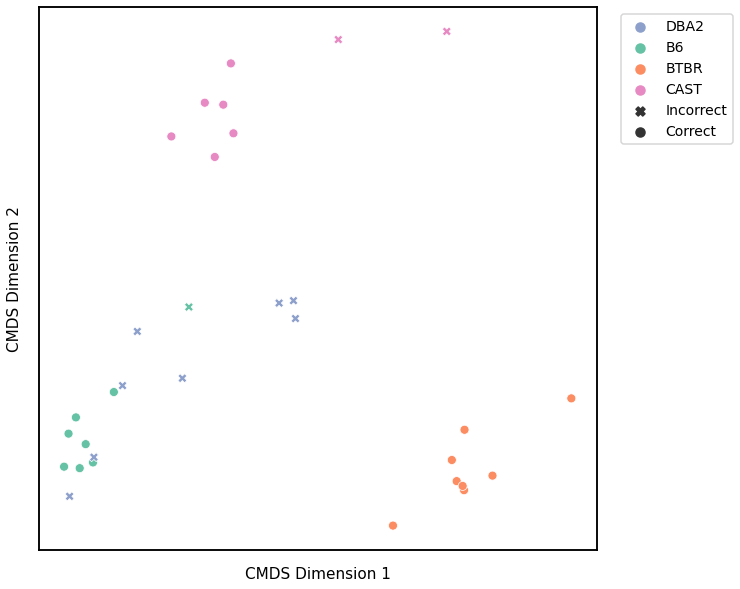

In [35]:
# HIDE CELL
# cluster dissimilarity matrix
edgeweight_l2_km_embedding, edgeweight_l2_km_pred = cluster_dissim(scaled_edgeweight_dissim_l2, y, method='kmeans', n_components=4)
edgeweight_l2_km, edgeweight_l2_km_pred = construct_df(edgeweight_l2_km_embedding, labels, y, edgeweight_l2_km_pred)

# calculate accuracy and ARI
edgeweight_l2_km_score = accuracy_score(y, edgeweight_l2_km_pred)
edgeweight_l2_km_ari = adjusted_rand_score(y, edgeweight_l2_km_pred)

print(f"Accuracy: {edgeweight_l2_km_score}")
print(f"ARI: {edgeweight_l2_km_ari}")

# plot clustering
fig = plot_clustering(labels, 'kmeans', data=edgeweight_l2_km)
fig.legend(bbox_to_anchor=(1.257, 1))

### Omnibus Embedding

Accuracy: 0.84375
ARI: 0.6916259721468621


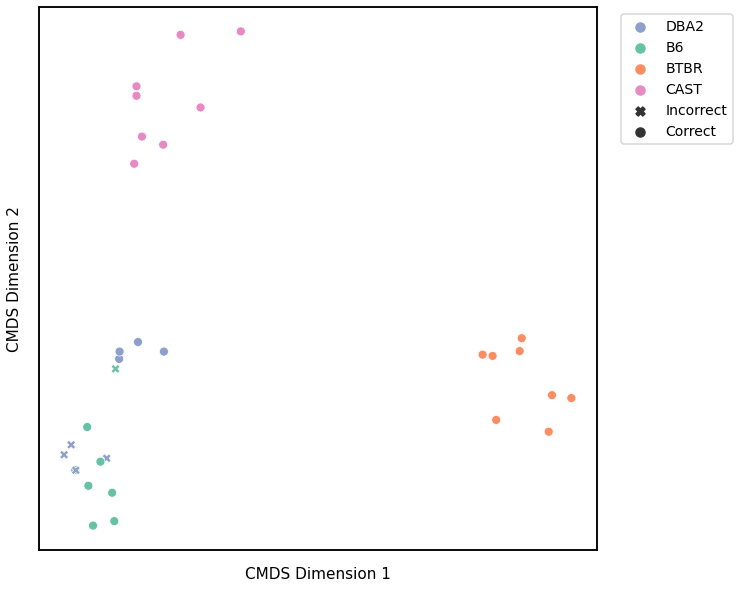

In [36]:
# HIDE CELL
# cluster dissimilarity matrix
omni_km_embedding, omni_km_pred = cluster_dissim(scaled_omni_dissim, y, method='kmeans', n_components=4)
omni_km, omni_km_pred = construct_df(omni_km_embedding, labels, y, omni_km_pred)

# calculate accuracy and ARI
omni_km_score = accuracy_score(y, omni_km_pred)
omni_km_ari = adjusted_rand_score(y, omni_km_pred)

print(f"Accuracy: {omni_km_score}")
print(f"ARI: {omni_km_ari}")

# plot clustering
fig = plot_clustering(labels, 'kmeans', data=omni_km)
fig.legend(bbox_to_anchor=(1.257, 1))

# ARI Plot

We use the adjusted rand index (ARI) to compare the performace of each clustering algorithm on each kernel. The ARI values are visualized with a scatter plot below, and the colors represent the different clustering algorithms. The kernels are sorted by the average ARI value of the three clustering algorithms, from highest to lowest. We also compute the ARI values for each clustering algorithm for a random matrix, which is indicated by the red dash line and should be close to 0. 

In [37]:
# HIDE CODE
# construct symmetric random matrix with zero diagonal
np.random.seed(3)
scaled_random = np.random.rand(len(graphs), len(graphs))
scaled_random = symmetrize(scaled_random)

# agglomerative clustering
random_linkage_matrix, random_pred = cluster_dissim(scaled_random, y, method="agg", n_components=4)
random_pred = remap_labels(y, random_pred)
random_agg_score = accuracy_score(y, random_pred)
random_agg_ari = adjusted_rand_score(y, random_pred)

# GMM
random_gm_embedding, random_gm_pred = cluster_dissim(scaled_random, y, method="gmm", n_components=4)
random_gm, random_gm_pred = construct_df(random_gm_embedding, labels, y, random_gm_pred)
random_gm_score = accuracy_score(y, random_gm_pred)
random_gm_ari = adjusted_rand_score(y, random_gm_pred)

# KMeans
random_km_embedding, random_km_pred = cluster_dissim(scaled_random, y, method="kmeans", n_components=4)
random_km, random_km_pred = construct_df(random_km_embedding, labels, y, random_km_pred)
random_km_score = accuracy_score(y, random_km_pred)
random_km_ari = adjusted_rand_score(y, random_km_pred)

random_avg_ari_val = (random_agg_ari + random_gm_ari + random_km_ari) / 3

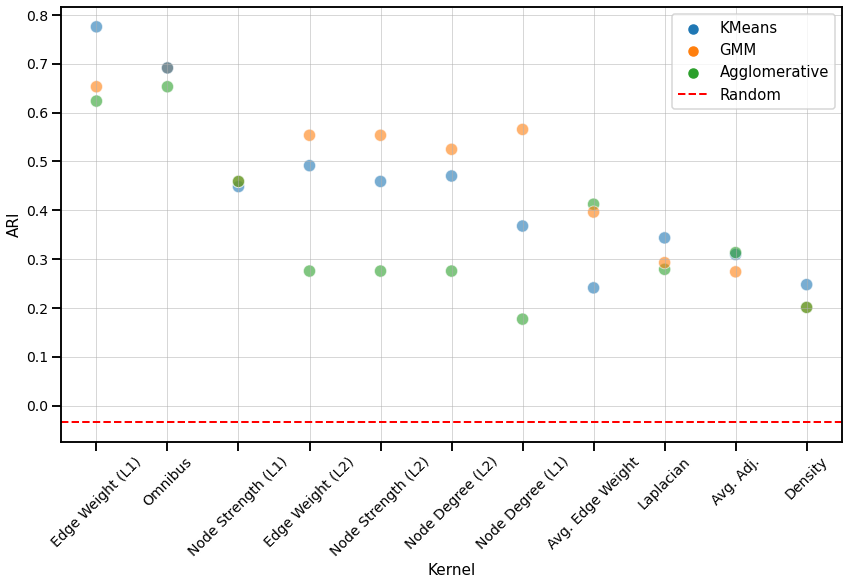

In [38]:
# HIDE CODE
from matplotlib.patches import Patch

kernels = ['Omnibus', 'Density', 'Avg. Edge Weight', 'Avg. Adj.', 'Laplacian', 'Node Degree (L1)', 'Node Degree (L2)', \
    'Node Strength (L1)', 'Node Strength (L2)', 'Edge Weight (L1)', 'Edge Weight (L2)']
kernels_df = [kernel for kernel in kernels for i in range(3)]
agg_ari = [omni_agg_ari, density_agg_ari, avgedgeweight_agg_ari, avgadjmat_agg_ari, lap_agg_ari, nodedeg_l1_agg_ari, \
    nodedeg_l2_agg_ari, nodestr_l1_agg_ari, nodestr_l2_agg_ari, edgeweight_l1_agg_ari, edgeweight_l2_agg_ari]
gm_ari = [omni_gm_ari, density_gm_ari, avgedgeweight_gm_ari, avgadjmat_gm_ari, lap_gm_ari, nodedeg_l1_gm_ari, \
    nodedeg_l2_gm_ari, nodestr_l1_gm_ari, nodestr_l2_gm_ari, edgeweight_l1_gm_ari, edgeweight_l2_gm_ari]
km_ari = [omni_km_ari, density_km_ari, avgedgeweight_km_ari, avgadjmat_km_ari, lap_km_ari, nodedeg_l1_km_ari, \
    nodedeg_l2_km_ari, nodestr_l1_km_ari, nodestr_l2_km_ari, edgeweight_l1_km_ari, edgeweight_l2_km_ari]

ari_vals = np.vstack((np.array(agg_ari), np.array(gm_ari), np.array(km_ari)))
ari_vals = np.ravel(ari_vals.T)
algos = ['Agglomerative', 'GMM', 'KMeans'] * len(agg_ari)

ari_df = pd.DataFrame(list(zip(kernels_df, ari_vals, algos)), columns=["Kernel", "ARI", "Algorithm"])

avg_ari_vals = (np.array(agg_ari) + np.array(gm_ari) + np.array(km_ari)) / 3
avg_ari_vals = [val for val in avg_ari_vals for i in range(3)]
ari_df["Average"] = avg_ari_vals
ari_df = ari_df.sort_values(by=['Average'], ascending=False)

ari_palette = {'KMeans': list(sns.color_palette())[0], 'GMM': list(sns.color_palette())[1], \
    'Agglomerative': list(sns.color_palette())[2]}
#patches = [Patch(color=v, label=k) for k,v in ari_palette.items()]

mice_cluster_fig, ax = plt.subplots(figsize=(14, 8), facecolor='w')
sns.set_context("talk", font_scale=0.9)
sns.scatterplot(x="Kernel", y="ARI", hue="Algorithm", data=ari_df, alpha=0.6, s=150, palette=ari_palette)
plt.axhline(y=random_avg_ari_val, color='r', linestyle='--', linewidth=2, label='Random')
plt.legend()
plt.xticks(rotation=45)
plt.grid(linewidth=0.5)

glue("mice_cluster", mice_cluster_fig, display=False)

```{glue:figure} mice_cluster_fig
:name: "mice-cluster"

Scatter plot comparing the ARI values of each clustering algorithm for every kernel, from highest to lowest based on the average ARI value. All kernels perform better than chance. 
```

We observe that the Edge weight kernel ($L^1$-norm) performs the best overall. Similar to that of the discriminability plot, kernels that use node matching perform better than those based on global properties, including the Laplacian spectral kernel. The order of the kernels in the ARI plot seem to follow a similar order of that in the discriminability plot for matched networks, which suggests that the dissimilarity matrix may influence their performance more than the choice in clustering algorithm. However, GMM does perform consistently well, either having the highest or middle ARI value for every kernel.